In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

## KMeans

![](http://i.stack.imgur.com/BILDt.png)

[Visualizations on synthetic datasets](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/)

## DBSCAN

![](https://www.sites.google.com/site/smeggaly/_/rsrc/1470329297099/dbscan/data-set_7.PNG?height=275&width=400)

[Original paper](http://www.aaai.org/Papers/KDD/1996/KDD96-037.pdf)

[Visualizations on synthetic datasets](https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/)

## Comparison

In [2]:
import numpy

from sklearn.datasets import make_circles, make_moons
from sklearn.preprocessing import scale

X_circle, y_circle = make_circles(n_samples=500, noise=.05, factor=.2)

X_moon, y_moon = make_moons(n_samples=300, noise=.07)
X_moon, y_moon = X_moon + 1.3, y_moon + 2

X = numpy.vstack((X_circle, X_moon))
y = numpy.concatenate((y_circle, y_moon))

X = scale(X)

In [3]:
def plot_labeled_clusters(points, labels):
    unique_labels = set(labels)
    label_count = len(unique_labels)
    
    colors = plt.cm.Spectral(numpy.linspace(0, 1, label_count))
    
    for label, color in zip(unique_labels, colors):
        
        if label == -1:
            color = 'k'
            label_count -= 1
        
        xy = points[labels == label]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=color)
        
    plt.title('Number of clusters: {}'.format(label_count))

C:\Python35\lib\site-packages\matplotlib\lines.py:1145: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markerfacecolor != fc:


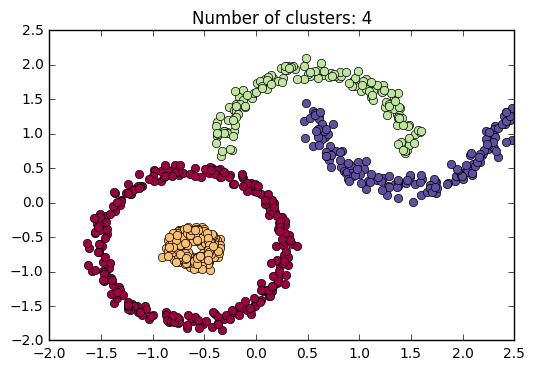

In [4]:
plot_labeled_clusters(X, y)

C:\Python35\lib\site-packages\matplotlib\lines.py:1145: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markerfacecolor != fc:


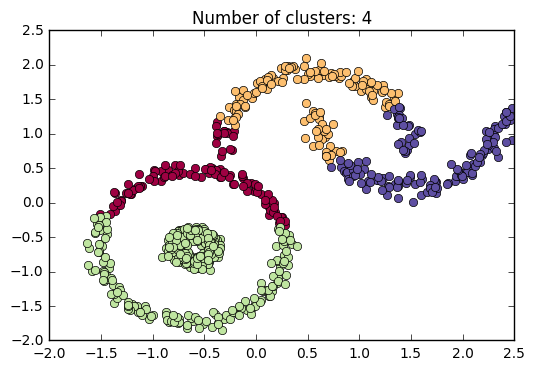

In [5]:
from sklearn.cluster import KMeans

n_clusters = len(set(y))
labels = KMeans(n_clusters=n_clusters).fit_predict(X)

plot_labeled_clusters(X, labels)

C:\Python35\lib\site-packages\matplotlib\lines.py:1145: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markerfacecolor != fc:


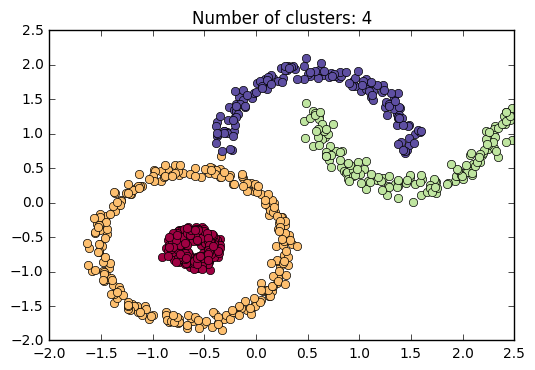

In [6]:
from sklearn.cluster import DBSCAN

labels = DBSCAN(eps=.2, min_samples=10).fit_predict(X)

plot_labeled_clusters(X, labels)

## Parameter Estimation

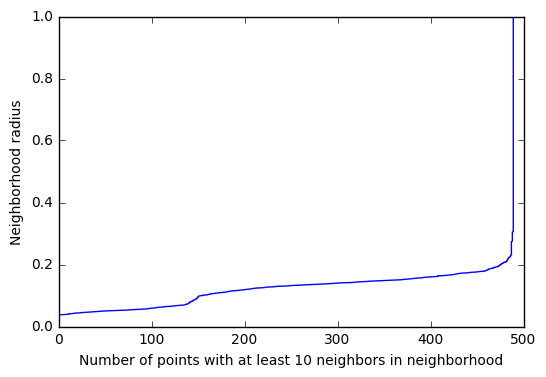

In [7]:
from sklearn.neighbors import kneighbors_graph

n_neighbors = 10
graph = kneighbors_graph(X, n_neighbors, mode='distance', metric='euclidean').todense()

counts = []
radiuses = numpy.arange(0, 1., .001)
for radius in radiuses:
    neighbors_in_radius = ((graph < radius) & (graph > 0))
    count = (neighbors_in_radius.sum(axis=0) >= n_neighbors).sum()
    counts.append(count)
    
plt.xlabel('Number of points with at least {} neighbors in neighborhood'.format(n_neighbors))
plt.ylabel('Neighborhood radius')
plt.plot(counts, radiuses);

## Scikit-Learn

![](http://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_0011.png)